In [133]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [134]:
import os
import matplotlib
import matplotlib.pyplot as plt
import glob
import math
import numpy as np
import pandas as pd
from bisect import *
from decimal import Decimal
#from scipy.optimize import curve_fit
#import scipy.special as sps

In [135]:
fname = '/Users/innocent/cernbox/HepSpec/Icelake/lhcbSim100FL.turbolog'

In [136]:
turbo =  pd.read_csv(fname, delimiter="\t", dtype='float32')

In [137]:
clus=turbo
print(clus.index)
print(clus.columns)
print(clus.size)
print(clus.describe())
print(clus.head())

RangeIndex(start=0, stop=4446, step=1)
Index(['Avg_MHz', 'Busy%', 'Bzy_MHz', 'TSC_MHz', 'IRQ', 'SMI', 'POLL', 'C1',
       'C2', 'POLL%', 'C1%', 'C2%', 'CPU%c1', 'CPU%c6', 'CoreTmp', 'PkgTmp',
       'Pkg%pc2', 'Pkg%pc6', 'PkgWatt', 'RAMWatt', 'PKG_%', 'RAM_%'],
      dtype='object')
97812
          Avg_MHz        Busy%      Bzy_MHz      TSC_MHz           IRQ  \
count  4446.00000  4446.000000  4446.000000  4446.000000   4446.000000   
mean   3133.13916    94.832573  3309.502441  2900.837891  36155.609375   
std     584.22406    17.851107    37.182564    56.276199   6928.892090   
min     111.00000     3.230000  2913.000000  2563.000000   2047.000000   
25%    3237.00000    99.989998  3299.000000  2869.000000  37056.000000   
50%    3290.00000   100.000000  3300.000000  2900.000000  38080.500000   
75%    3336.00000   100.000000  3300.000000  2933.000000  38859.000000   
max    3704.00000   100.000000  3493.000000  3255.000000  47131.000000   

          SMI         POLL             C1 

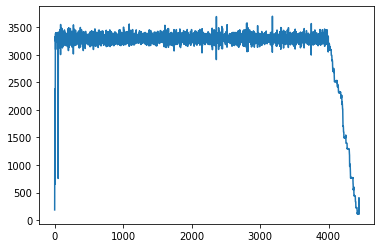

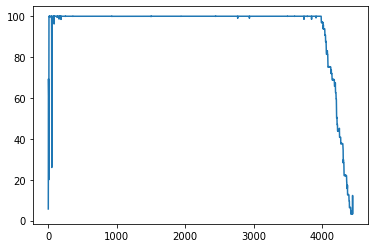

In [138]:
turbo['Avg_MHz'].plot()
plt.show()
turbo['Busy%'].plot()
plt.show()

In [139]:
top = '/Users/innocent/cernbox/HepSpec'
os.chdir(top)
archs = os.listdir()
print (archs)
turbo = {}
for dir in archs:
    turbo[dir] = {}
    ldir = top +'/' + dir
    os.chdir(ldir)
    files = os.listdir()
    files.sort()
    print(files)
    for f in files :
        if 'F.turbolog' in f :
            wf = f.split('F')[0]
            #print(wf)
            turbo[dir][wf] = pd.read_csv(f, delimiter="\t", dtype='float32')


['Skylake', 'Haswell', 'Icelake']
['aliceSim10F.turbolog', 'aliceSim10H.turbolog', 'atlaSim10F.turbolog', 'atlaSim10H.turbolog', 'atlasGen500F.turbolog', 'atlasGen500H.turbolog', 'atlasReco200F.turbolog', 'atlasReco200H.turbolog', 'cmsDigi100F.turbolog', 'cmsDigi100H.turbolog', 'cmsRecoDQM100F.turbolog', 'cmsRecoDQM100H.turbolog', 'cmsSim50F.turbolog', 'cmsSim50H.turbolog', 'igwnF.turbolog', 'igwnH.turbolog', 'lhcbSim100FL.turbolog', 'lhcbSim100H.turbolog', 'lhcbSim50F.turbolog', 'skylake.count', 'skylakeFull.count', 'skylakeHalf.count']
['aliceSim10F.turbolog', 'aliceSim10H.turbolog', 'atlaSim10F.turbolog', 'atlaSim10H.turbolog', 'atlasGen500F.turbolog', 'atlasGen500H.turbolog', 'atlasReco200F.turbolog', 'atlasReco200H.turbolog', 'cmsDigi100F.turbolog', 'cmsDigi100H.turbolog', 'cmsRecoDQM100F.turbolog', 'cmsRecoDQM100H.turbolog', 'cmsSim50F.turbolog', 'cmsSim50H.turbolog', 'haswell.count', 'haswellFull.count', 'haswellHalf.count', 'igwnF.turbolog', 'igwnH.turbolog', 'lhcbSim100FL.turb

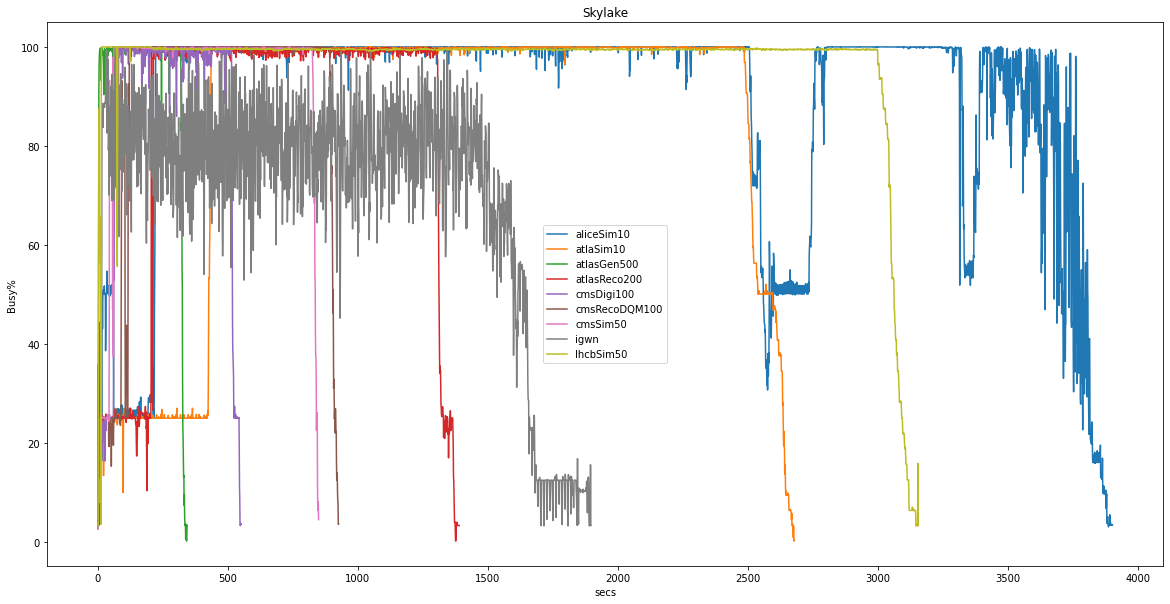

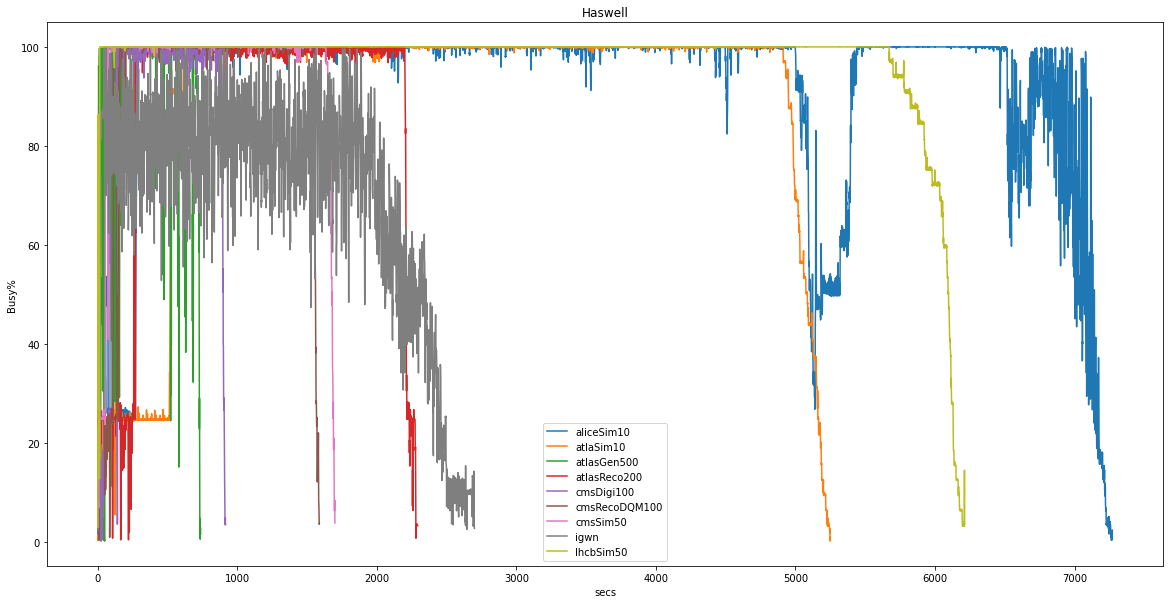

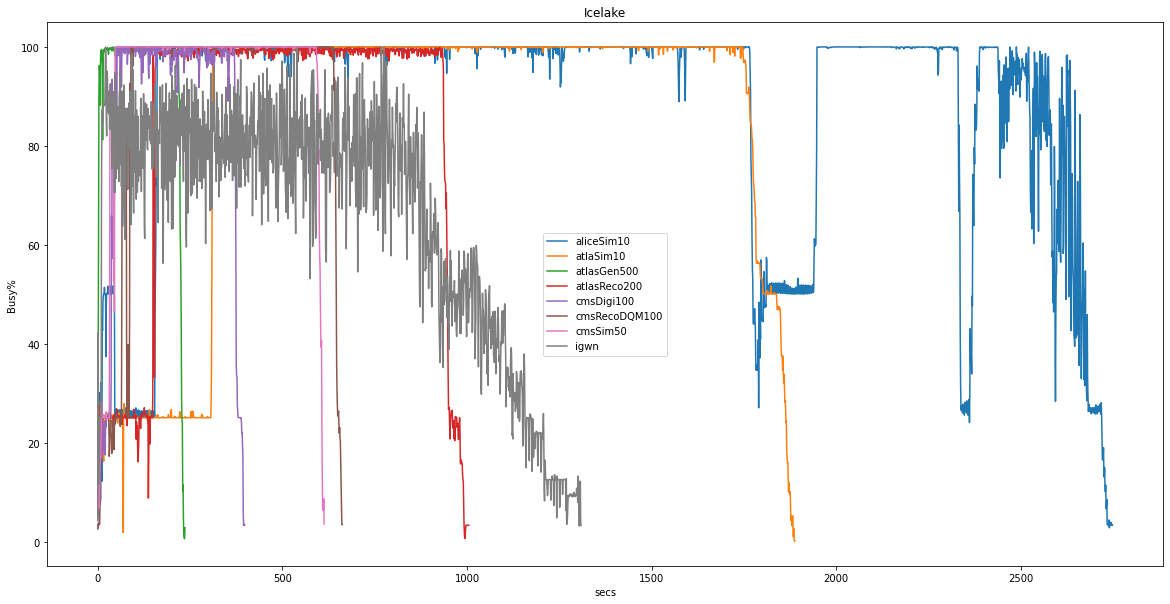

In [140]:
var ='Busy%' 
#'Avg_MHz'
for arch in turbo :
    fig, axs = plt.subplots(figsize=(20, 10))
    for wf in turbo[arch] :
        turbo[arch][wf][var].plot(ax=axs,label=wf)
    axs.set_ylabel(var)
    axs.set_xlabel('secs')
    axs.set_title(arch)
    axs.legend()
    plt.show()
